**Dropping constant features**

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 

In [2]:
data.head()

NameError: name 'data' is not defined

**Drop constant Features using Variance Threshold**

In [4]:
### It will zero variance features

from sklearn.feature_selection import VarianceThreshold
# 0 Variance
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

In [5]:
var_thres.get_support()

array([ True,  True, False, False])

In [6]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [7]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [8]:
for feature in constant_columns:
     print(feature)


C
D


In [9]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


In [3]:
df=pd.read_csv("../../Bigdata Files/train-data.csv")


In [4]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [5]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
df1=pd.get_dummies(df[["Location","Fuel_Type","Transmission","Owner_Type"]],drop_first=True)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [7]:
dfe=pd.concat([df,df1],axis=1)
dfe

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,1,0,0,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,1,0,0,0,1,0,1,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,1,1,0,0,0


In [8]:
dfe=dfe.drop(["Unnamed: 0","Name","Location","Fuel_Type","Transmission","Owner_Type","New_Price"],axis=1)

In [9]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [10]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [11]:
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [12]:
dfe[df.Mileage=="null"]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third


In [13]:
dfe.loc[df.Engine=="null","Engine"]

Series([], Name: Engine, dtype: object)

In [14]:
dfe["Mileage"]=dfe["Mileage"].apply(lambda x:float(str(x).split(" ")[0]))
dfe.Engine=dfe.Engine.apply(lambda x:float(str(x).split(" ")[0]))
dfe.Power=dfe.Power.apply(lambda x:str(x).split(" ")[0])

In [15]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [16]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [17]:
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                         0
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [18]:
dfe[dfe.Power=="null"]["Power"]=0

/tmp/ipykernel_8249/746306916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe[dfe.Power=="null"]["Power"]=0


In [19]:
dfe.loc[dfe.Power=="null","Power"]=0
dfe.loc[dfe.Mileage=="null","Mileage"]=0
dfe.loc[dfe.Engine=="null","Engine"]=0

In [20]:
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                         0
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [21]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [22]:
dfe.Power=dfe.Power.astype(float)

In [23]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [24]:
import numpy as np

In [25]:
dfe[dfe.Engine==0]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third


In [26]:
dfe[dfe.Power==0]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
76,2008,111111,17.80,1399.0,0.0,5.0,2.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
79,2005,87591,0.00,1086.0,0.0,5.0,1.30,0,0,0,...,0,0,0,0,0,1,1,0,0,0
89,2007,73745,17.00,1086.0,0.0,5.0,2.10,0,0,0,...,0,0,0,0,0,1,1,0,0,0
120,2005,102000,17.00,1086.0,0.0,5.0,0.85,0,0,0,...,1,0,0,0,0,1,1,0,1,0
143,2008,80759,17.00,1086.0,0.0,5.0,1.67,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,2006,47200,17.00,1086.0,0.0,5.0,1.20,0,0,0,...,0,1,0,0,0,1,1,0,1,0
5893,2008,51000,19.50,1061.0,0.0,NaN,1.75,0,1,0,...,0,0,0,0,0,1,1,0,1,0
5925,2010,85000,17.50,1798.0,0.0,5.0,2.85,0,0,0,...,0,1,0,0,0,1,1,0,0,0
5943,2002,75000,0.00,2112.0,0.0,6.0,1.70,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [27]:
dfe[dfe.Mileage==0]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
14,2012,85000,0.0,2179.0,115.0,5.0,17.50,0,0,0,...,0,1,1,0,0,0,0,0,1,0
67,2019,15369,0.0,1950.0,194.0,5.0,35.67,0,0,1,...,0,0,1,0,0,0,0,0,0,0
79,2005,87591,0.0,1086.0,0.0,5.0,1.30,0,0,0,...,0,0,0,0,0,1,1,0,0,0
194,2007,60006,0.0,NaN,NaN,NaN,2.95,0,0,0,...,0,0,0,0,0,1,1,0,0,0
229,2015,70436,0.0,1498.0,99.0,NaN,3.60,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,2001,227000,0.0,2446.0,0.0,8.0,2.20,0,0,0,...,1,0,1,0,0,0,1,1,0,0
5875,2019,4000,0.0,1950.0,194.0,5.0,35.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5943,2002,75000,0.0,2112.0,0.0,6.0,1.70,0,1,0,...,0,0,1,0,0,0,1,0,0,0
5972,2008,65000,0.0,1086.0,62.0,5.0,1.39,0,0,0,...,1,0,0,0,0,1,1,0,1,0


In [28]:
dfe.loc[dfe.Engine==0,"Engine"]=np.nan
dfe.loc[dfe.Power==0,"Power"]=np.nan
dfe.loc[dfe.Mileage==0,"Mileage"]=np.nan

In [29]:
dfe.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [30]:
dfe.Mileage=dfe.Mileage.fillna(dfe.Mileage.mean())
dfe.Engine=dfe.Engine.fillna(dfe.Engine.median())
dfe.Power=dfe.Power.fillna(dfe.Power.median())
dfe.Seats=dfe.Seats.fillna(dfe.Seats.mode()[0])

In [31]:
dfe.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

###### Apply the Variance threshold

In [266]:
var_thres=VarianceThreshold(threshold=.1)
var_thres.fit(dfe)

VarianceThreshold(threshold=0.1)

In [267]:
dfe.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [268]:
dfe.columns[var_thres.get_support()]

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Hyderabad', 'Location_Mumbai', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second'],
      dtype='object')

In [269]:
constant_columns = [column for column in dfe.columns
                    if column not in dfe.columns[var_thres.get_support()]]

print(len(constant_columns))

12


In [270]:
# dfe.drop(constant_columns,axis=1)

# Feature Selection - With Correlation 

In [271]:
import matplotlib.pyplot as plt

In [272]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [273]:
dfe.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [274]:
# if independent variable is highly correlated with dependent variable we could not remove

In [276]:
# if independet variables they are highly correlated each other with 90 % or 85% we can remove
# eg : 3 variable correlated each other we can remove and use 1 ,it behave duplicated feature

In [277]:
X=dfe.drop("Price",axis=1)
y=dfe["Price"]

In [278]:
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [279]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [282]:
X_train.shape

(4213, 24)

In [283]:
X_test.shape

(1806, 24)

In [284]:
import seaborn as sns

<Axes: >

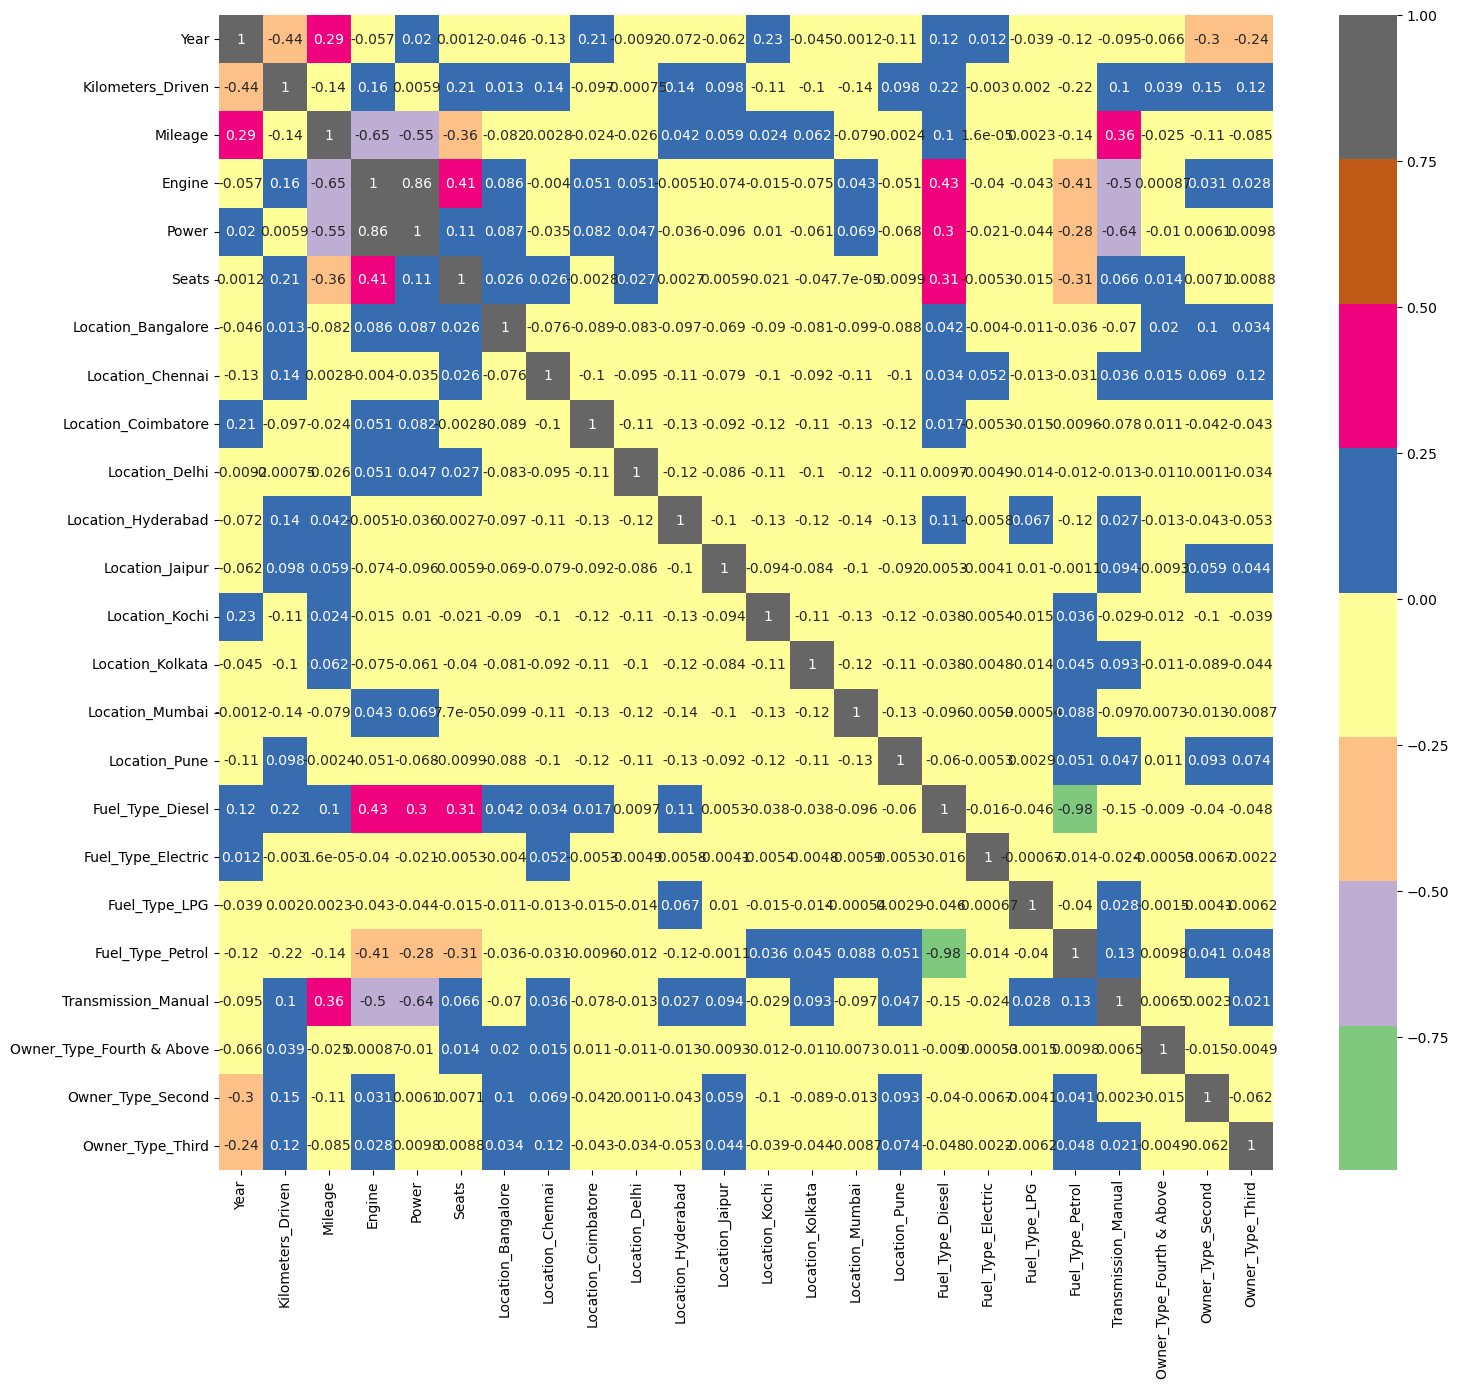

In [302]:
plt.figure(figsize=(17,15))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Accent)

In [299]:
cor

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
Year,1.000000,-0.440749,0.290262,-0.057089,0.019877,0.001168,-0.045538,-0.125508,0.208820,-0.009184,...,-0.001233,-0.109425,0.124689,0.012393,-0.039026,-0.124305,-0.095490,-0.065981,-0.295451,-0.237374
Kilometers_Driven,-0.440749,1.000000,-0.136276,0.156715,0.005899,0.208303,0.013373,0.141542,-0.096548,-0.000749,...,-0.136509,0.098181,0.216462,-0.003045,0.002009,-0.216882,0.103522,0.039304,0.149908,0.116513
Mileage,0.290262,-0.136276,1.000000,-0.648318,-0.550839,-0.355491,-0.082457,0.002787,-0.024090,-0.025919,...,-0.079360,-0.002424,0.101127,0.000016,0.002276,-0.135495,0.357105,-0.024780,-0.112953,-0.084548
Engine,-0.057089,0.156715,-0.648318,1.000000,0.857155,0.414802,0.085578,-0.004031,0.050605,0.051321,...,0.042799,-0.050693,0.433517,-0.039601,-0.043259,-0.412521,-0.497868,0.000868,0.030902,0.027544
Power,0.019877,0.005899,-0.550839,0.857155,1.000000,0.113272,0.086528,-0.035150,0.082197,0.047051,...,0.069154,-0.068283,0.296728,-0.020788,-0.043974,-0.276447,-0.639877,-0.010010,0.006067,0.009838
Seats,0.001168,0.208303,-0.355491,0.414802,0.113272,1.000000,0.026296,0.025956,-0.002792,0.027445,...,0.000077,-0.009909,0.314375,-0.005287,-0.014967,-0.308240,0.066103,0.013925,0.007114,0.008778
Location_Bangalore,-0.045538,0.013373,-0.082457,0.085578,0.086528,0.026296,1.000000,-0.076208,-0.088787,-0.082648,...,-0.099358,-0.088118,0.042103,-0.003976,-0.011255,-0.036272,-0.069603,0.019602,0.101958,0.034019
Location_Chennai,-0.125508,0.141542,0.002787,-0.004031,-0.035150,0.025956,-0.076208,1.000000,-0.101623,-0.094597,...,-0.113723,-0.100857,0.034336,0.052171,-0.012882,-0.031147,0.035524,0.015198,0.069414,0.115321
Location_Coimbatore,0.208820,-0.096548,-0.024090,0.050605,0.082197,-0.002792,-0.088787,-0.101623,1.000000,-0.110211,...,-0.132494,-0.117504,0.017455,-0.005302,-0.015008,-0.009615,-0.078370,0.010547,-0.042436,-0.043228
Location_Delhi,-0.009184,-0.000749,-0.025919,0.051321,0.047051,0.027445,-0.082648,-0.094597,-0.110211,1.000000,...,-0.123333,-0.109380,0.009743,-0.004935,-0.013971,-0.012275,-0.013127,-0.011041,0.001057,-0.033647


In [308]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [309]:
corr_features = correlation(X_train, 0.80)
len(set(corr_features))

1

In [310]:
corr_features

{'Power'}

In [311]:
X_train.drop("Power",axis=1,inplace=True)
X_test.drop("Power",axis=1,inplace=True)

# Feature Selection with Information gain  (Mutual information in classification Problem)

In [314]:
# applied in classification problem

Mutual Information
MI Estimate mutual information for a discrete target variable.

###### Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

# The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

# Inshort

# A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

In [313]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [317]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4201,2011,77000,22.07,1199.0,73.9,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4383,2016,19947,20.36,1197.0,78.9,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1779,2014,70963,15.10,2179.0,140.0,7.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4020,2013,115195,25.20,1248.0,74.0,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3248,2011,58752,16.47,1198.0,73.9,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
#     df['Wine'],
#     test_size=0.3,
#     random_state=0)

In [319]:
# from sklearn.feature_selection import mutual_info_classif
# # determine the mutual information
# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info

In [321]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

In [ ]:
#let's plot the ordered mutual_info values per feature
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
# select best 5 fetaure columns

In [ ]:
# from sklearn.feature_selection import SelectKBest

In [ ]:
# #No we Will select the  top 5 important features
# sel_five_cols = SelectKBest(mutual_info_classif, k=5)
# sel_five_cols.fit(X_train, y_train)
# X_train.columns[sel_five_cols.get_support()]

# Feature Selection-Information gain - mutual information In Regression Problem Statements

In [32]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


Mutual Information
Estimate mutual information for a continuous target variable.

In [33]:
# take numeric values in the data set

# numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [34]:
# findout best features in the field

In [35]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [36]:
X=dfe.drop("Price",axis=1)
y=dfe["Price"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4201,2011,77000,22.07,1199.0,73.9,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4383,2016,19947,20.36,1197.0,78.9,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1779,2014,70963,15.10,2179.0,140.0,7.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4020,2013,115195,25.20,1248.0,74.0,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3248,2011,58752,16.47,1198.0,73.9,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2015,27000,17.97,1498.0,99.6,5.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5191,2019,9000,12.62,2198.0,158.0,7.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5226,2013,140000,15.10,2179.0,140.0,7.0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5390,2014,76414,25.80,1498.0,98.6,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [40]:
dfe.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [41]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info

array([0.25872525, 0.07657425, 0.44146711, 0.61139515, 0.78038077,
       0.07360326, 0.        , 0.01859951, 0.07547902, 0.        ,
       0.01018407, 0.00495903, 0.04869833, 0.0206646 , 0.00820081,
       0.01592911, 0.13127479, 0.        , 0.00439643, 0.12189445,
       0.24507353, 0.00765734, 0.01850677, 0.01035459])

In [43]:
mutual_info.shape

(24,)

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


Power                        0.780381
Engine                       0.611395
Mileage                      0.441467
Year                         0.258725
Transmission_Manual          0.245074
Fuel_Type_Diesel             0.131275
Fuel_Type_Petrol             0.121894
Kilometers_Driven            0.076574
Location_Coimbatore          0.075479
Seats                        0.073603
Location_Kochi               0.048698
Location_Kolkata             0.020665
Location_Chennai             0.018600
Owner_Type_Second            0.018507
Location_Pune                0.015929
Owner_Type_Third             0.010355
Location_Hyderabad           0.010184
Location_Mumbai              0.008201
Owner_Type_Fourth & Above    0.007657
Location_Jaipur              0.004959
Fuel_Type_LPG                0.004396
Location_Delhi               0.000000
Fuel_Type_Electric           0.000000
Location_Bangalore           0.000000
dtype: float64

<Axes: >

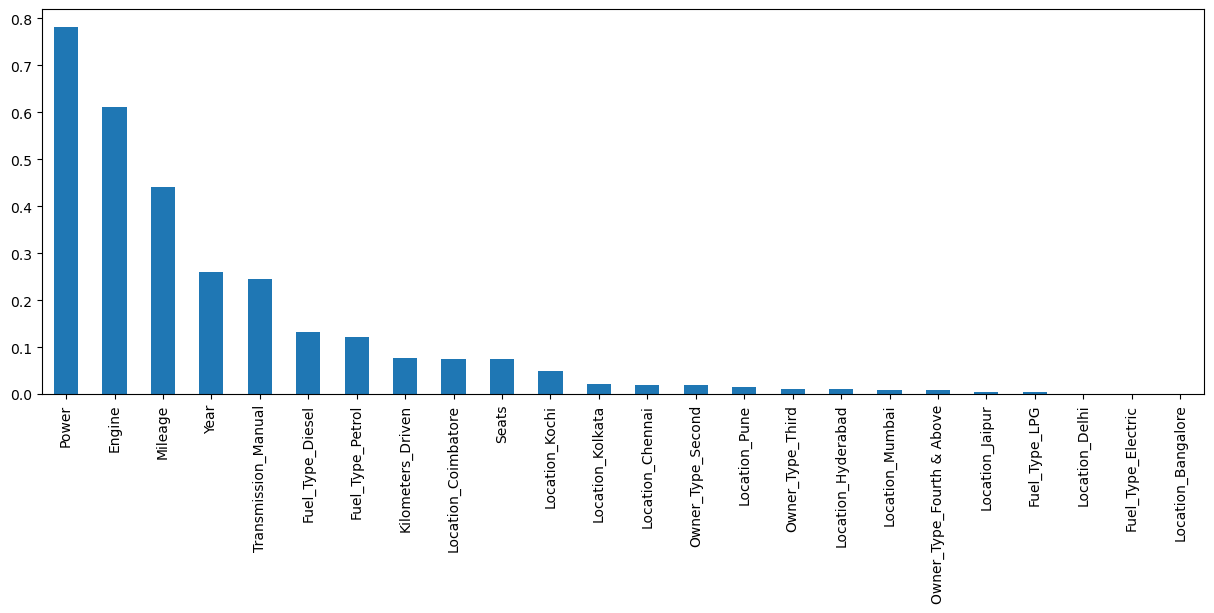

In [45]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [46]:
# select top k features

In [47]:
from sklearn.feature_selection import SelectPercentile

In [48]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f9b166fb490>)

In [49]:
selected_top_columns.get_support()

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [50]:
X_train.columns[selected_top_columns.get_support()]

Index(['Year', 'Mileage', 'Engine', 'Power', 'Transmission_Manual'], dtype='object')

# Chi Square For Feature Selection

Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.

In [51]:
import seaborn as sns

In [56]:
dfe.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [54]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [57]:
df=sns.load_dataset('titanic')

In [58]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [60]:
# find which one is importatnt

In [59]:
# categogry features
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [61]:
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [63]:
# befor performing chi sqaure test we need to perform encoding

In [64]:
import numpy as np

In [65]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

/tmp/ipykernel_8249/1768065499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=np.where(df['sex']=="male",1,0)


,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [66]:
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

/tmp/ipykernel_8249/431536539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].map(ordinal_label)


In [67]:
df

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0
...,...,...,...,...,...
886,1,0,True,2,0
887,0,0,True,1,1
888,0,0,False,3,0
889,1,1,True,1,1


In [68]:
df['alone']=np.where(df['alone']==True,1,0)

/tmp/ipykernel_8249/2119716473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alone']=np.where(df['alone']==True,1,0)


In [69]:
df

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0
...,...,...,...,...,...
886,1,0,1,2,0
887,0,0,1,1,1
888,0,0,0,3,0
889,1,1,1,1,1


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],df['survived'],test_size=0.3,random_state=100)

In [71]:
df.isna().sum()

sex         0
embarked    0
alone       0
pclass      0
survived    0
dtype: int64

In [72]:
# perform chi2 Test
# CHI2 RETURNS 2 values
#  Fscore and p value
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [73]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [ ]:
# fscore value is high it is good
# p value is takes as low

In [75]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns

In [76]:
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [80]:
p_values.sort_values()

sex         5.306038e-16
pclass      2.755149e-06
alone       9.696105e-04
embarked    5.999221e-03
dtype: float64

In [78]:
p_values.sort_index(ascending=True)

alone       9.696105e-04
embarked    5.999221e-03
pclass      2.755149e-06
sex         5.306038e-16
dtype: float64

In [79]:
# Observation
# Sex Column is the most important column when compared to the output feature Survived